# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('previsao_de_renda.csv')

In [3]:
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [5]:
df['data_ref'] = pd.to_datetime(df['data_ref'])

In [6]:
df['year_month'] = df['data_ref'].dt.to_period('M')

In [7]:
def plot_qualitative_distribution(df, column):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='year_month', hue=column, palette='viridis')
    plt.title(f'Distribuição de {column} ao longo do tempo')
    plt.xlabel('Ano-Mês')
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [8]:
qualitative = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

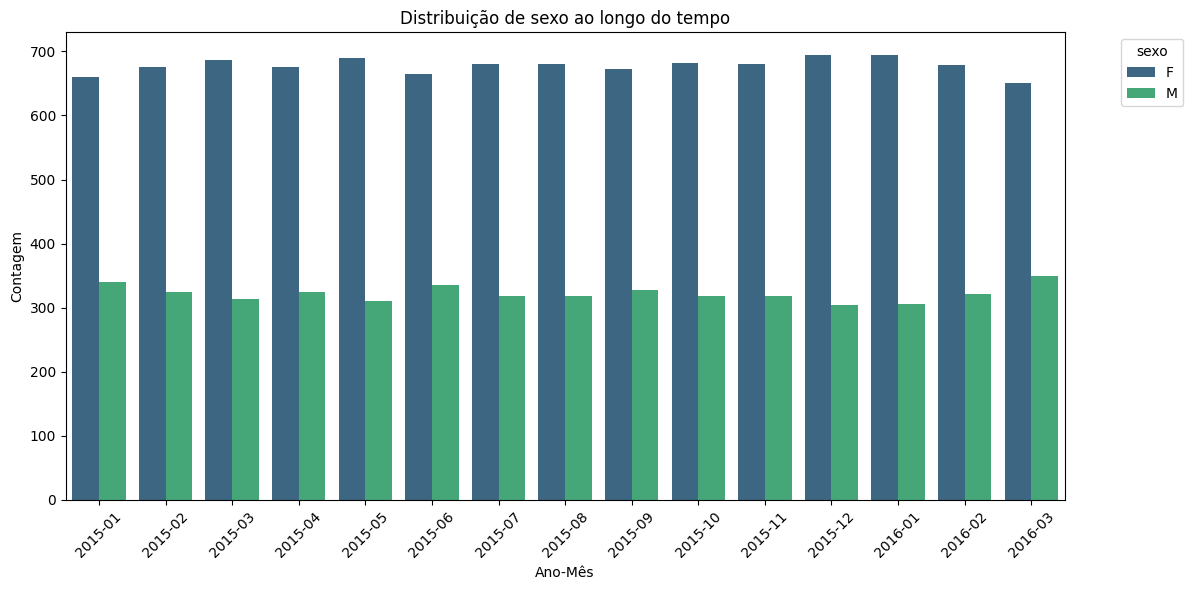

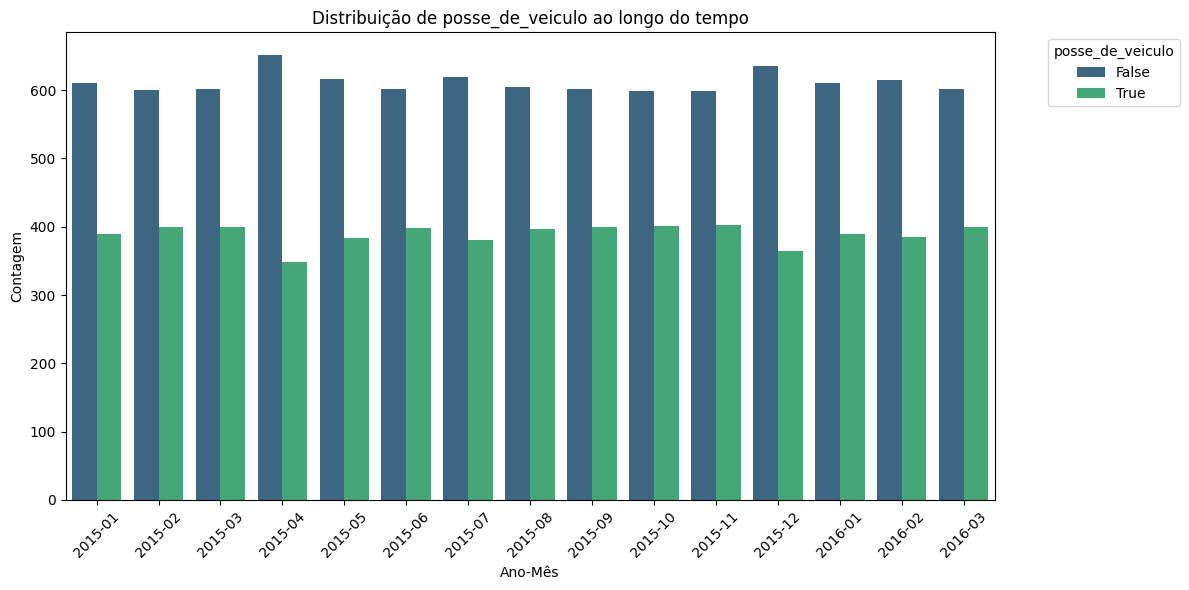

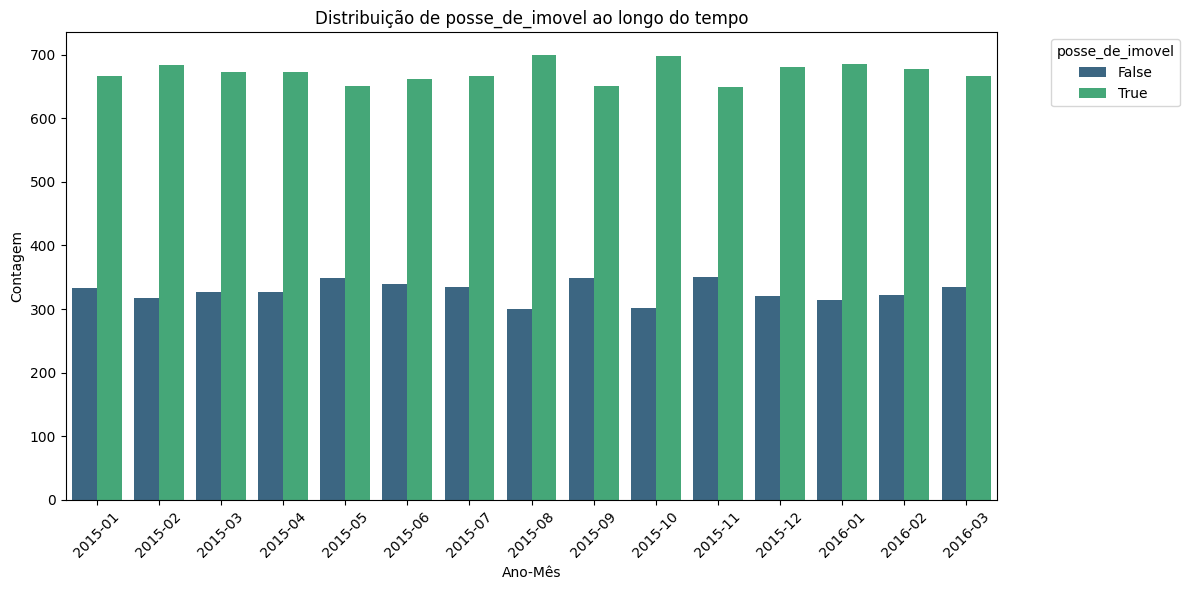

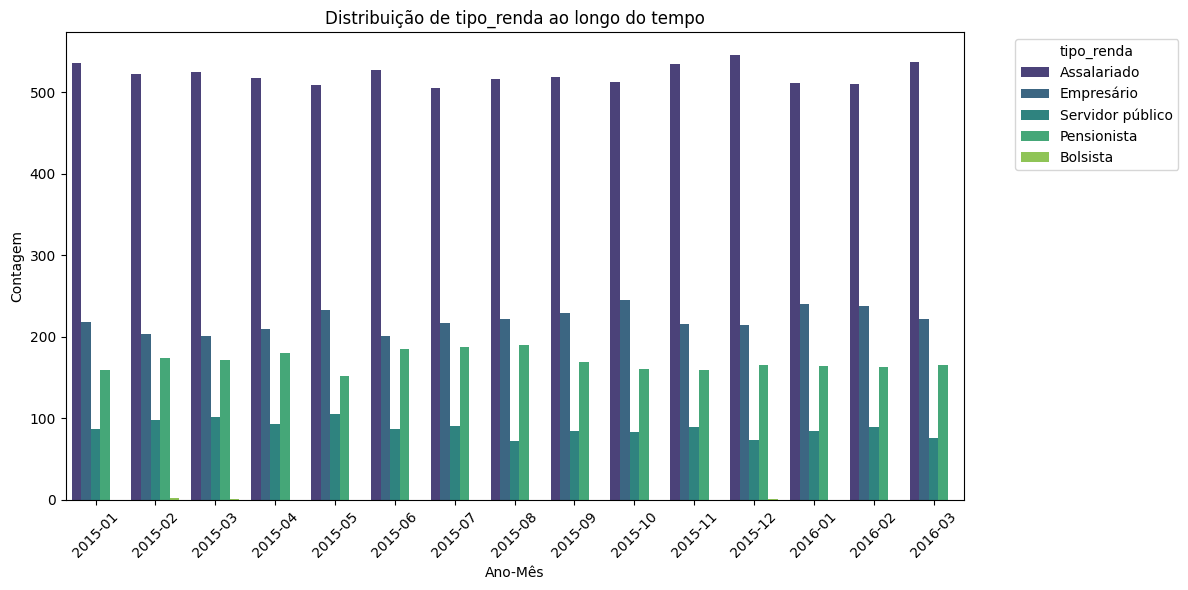

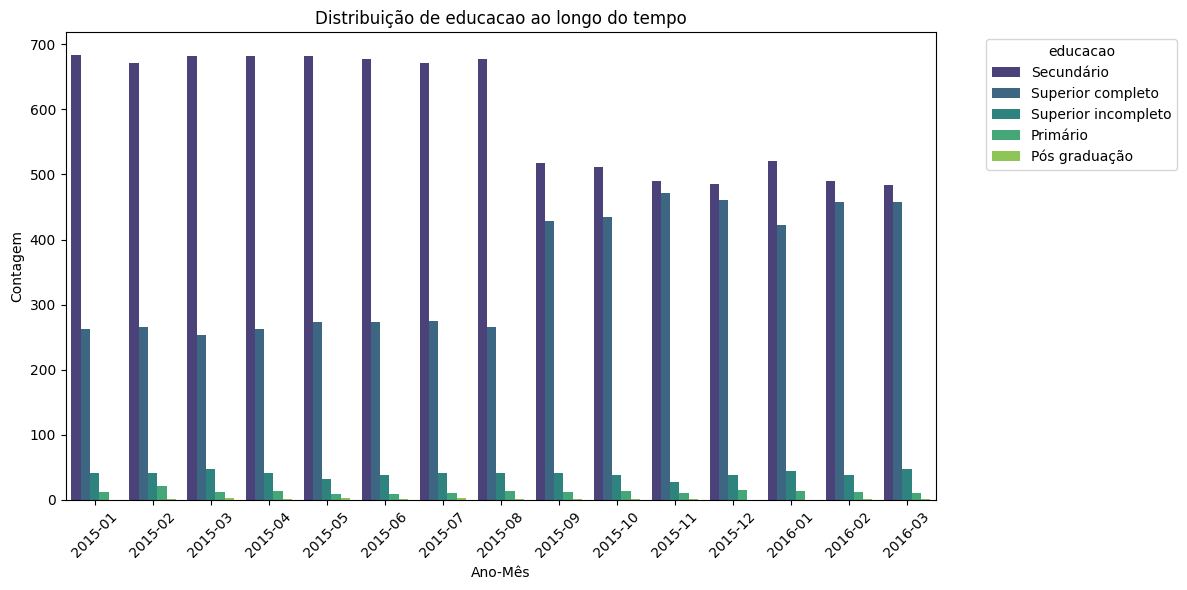

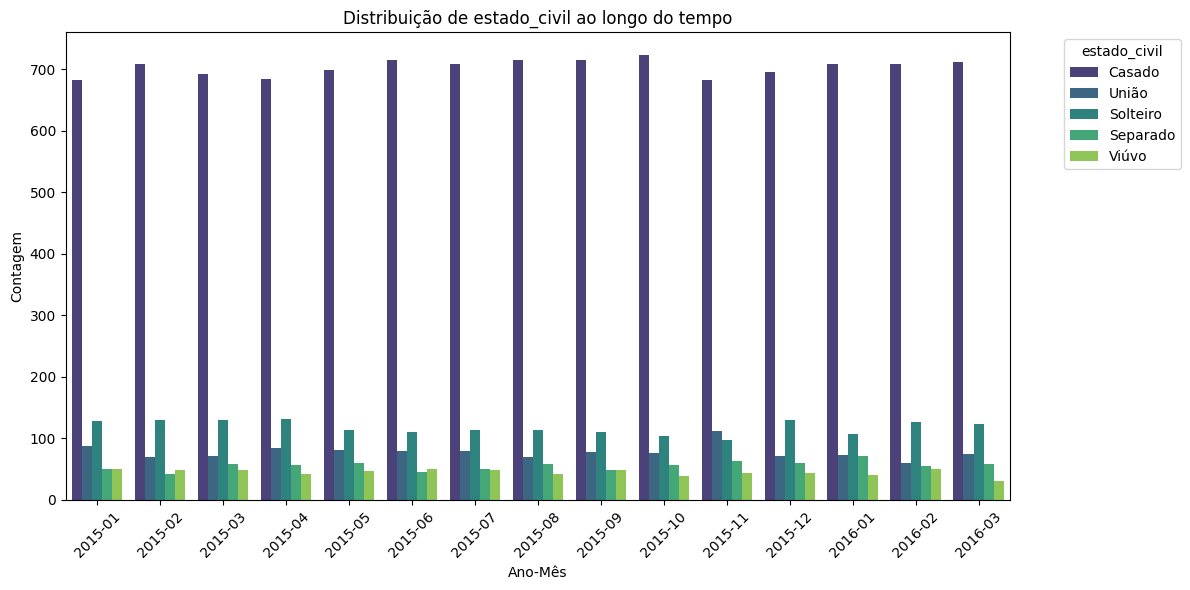

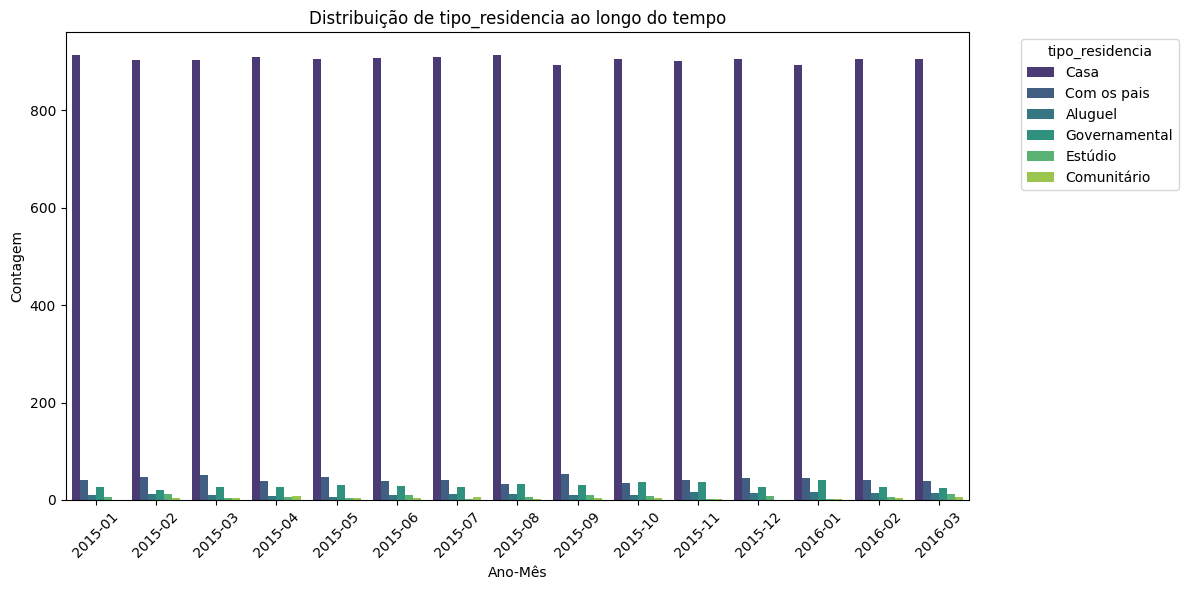

In [9]:
for col in qualitative:
    plot_qualitative_distribution(df, col)

In [10]:
def chi_square_test(df, column):
    contingency_table = pd.crosstab(df['year_month'], df[column])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    return p

In [11]:
results = {}
for col in qualitative:
    p_value = chi_square_test(df, col)
    results[col] = p_value

In [12]:
print("Resultados do teste qui-quadrado para variáveis qualitativas:")
for col, p_value in results.items():
    print(f"{col}: p-value = {p_value}")

Resultados do teste qui-quadrado para variáveis qualitativas:
sexo: p-value = 0.788275726234441
posse_de_veiculo: p-value = 0.4627553850618732
posse_de_imovel: p-value = 0.31844064580254183
tipo_renda: p-value = 0.30394737819901146
educacao: p-value = 1.8983062118942244e-90
estado_civil: p-value = 0.18732721084327023
tipo_residencia: p-value = 0.3938069255896858


Os resultados do teste qui-quadrado que você forneceu indicam que, para a maioria das variáveis qualitativas testadas (sexo, posse de veículo, posse de imóvel, tipo de renda, estado civil e tipo de residência), não há evidências suficientes para sugerir uma associação estatisticamente significativa com a variável que está sendo testada, já que os valores-p são maiores que 0,05.

No entanto, a variável ‘educação’ tem um valor-p extremamente baixo (aproximadamente 1.9e-90), o que sugere uma associação muito significativa com a variável em questão. Isso significa que é muito improvável que a distribuição observada para ‘educação’ seja devido ao acaso.

Dentre todos os gráficos apresentados, uma das variáveis qualitativas que se destaca das demais é a escolaridade. Ao longo do tempo, a partir de setembro de 2015, houve um aumento significativo de dados com a escolaridade de ensino superior completo, o que resultou em uma queda na quantidade de dados com a escolaridade secundária. A distribuição manteve a mesma proporção até o final do período analisado após essa alteração, e seria importante investigar essa mudança.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

<ipython-input-14-8ea99851feb1>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, ci=95, ax=axes[1])
<ipython-input-14-8ea99851feb1>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


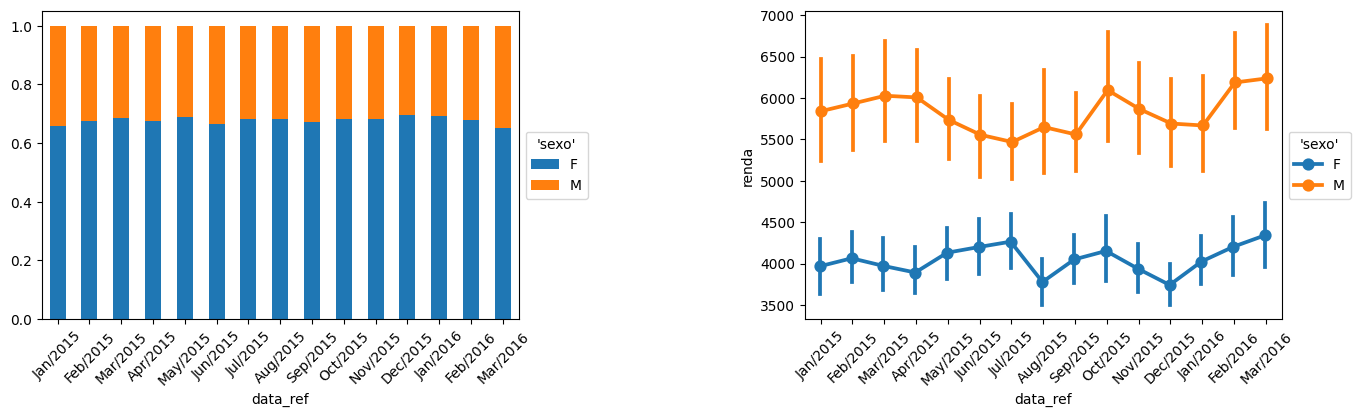

<ipython-input-14-8ea99851feb1>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, ci=95, ax=axes[1])
<ipython-input-14-8ea99851feb1>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


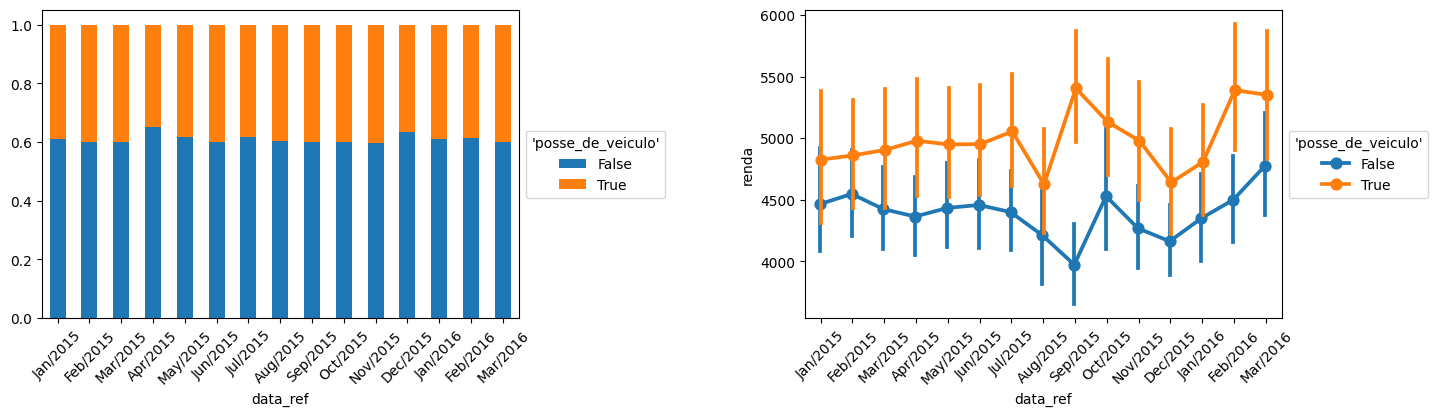

<ipython-input-14-8ea99851feb1>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, ci=95, ax=axes[1])
<ipython-input-14-8ea99851feb1>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


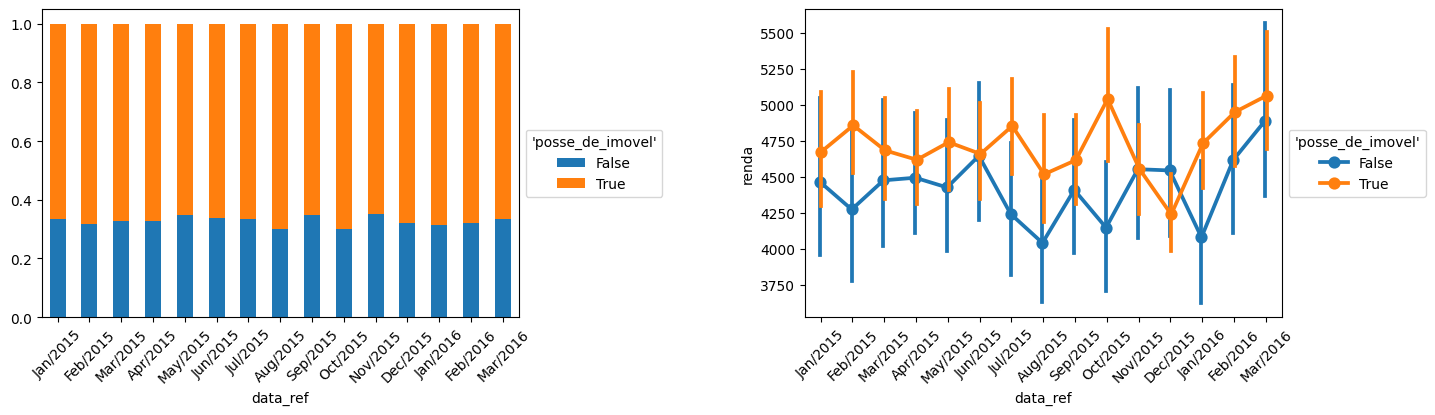

<ipython-input-14-8ea99851feb1>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, ci=95, ax=axes[1])
<ipython-input-14-8ea99851feb1>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


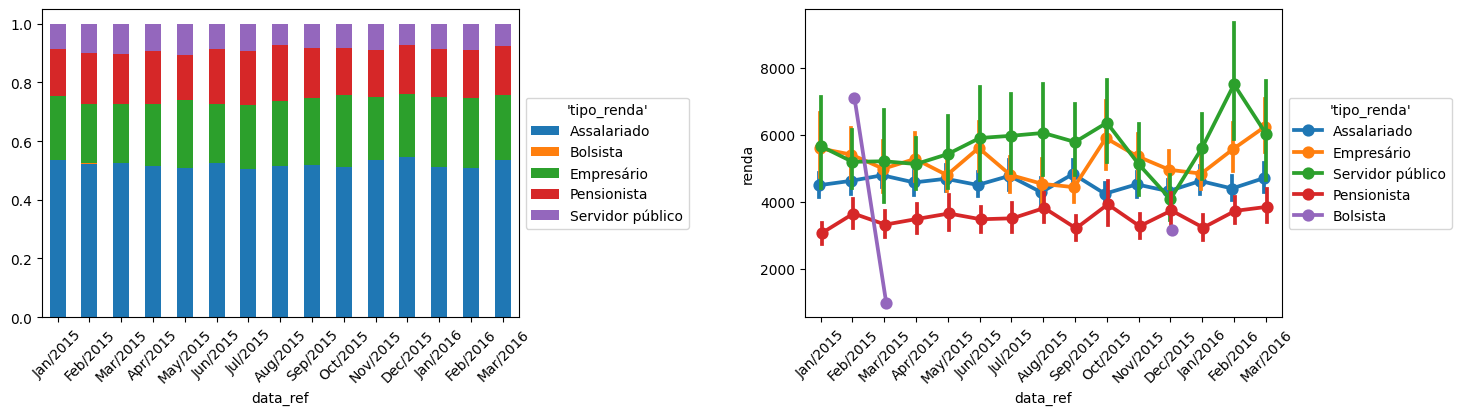

<ipython-input-14-8ea99851feb1>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, ci=95, ax=axes[1])
<ipython-input-14-8ea99851feb1>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


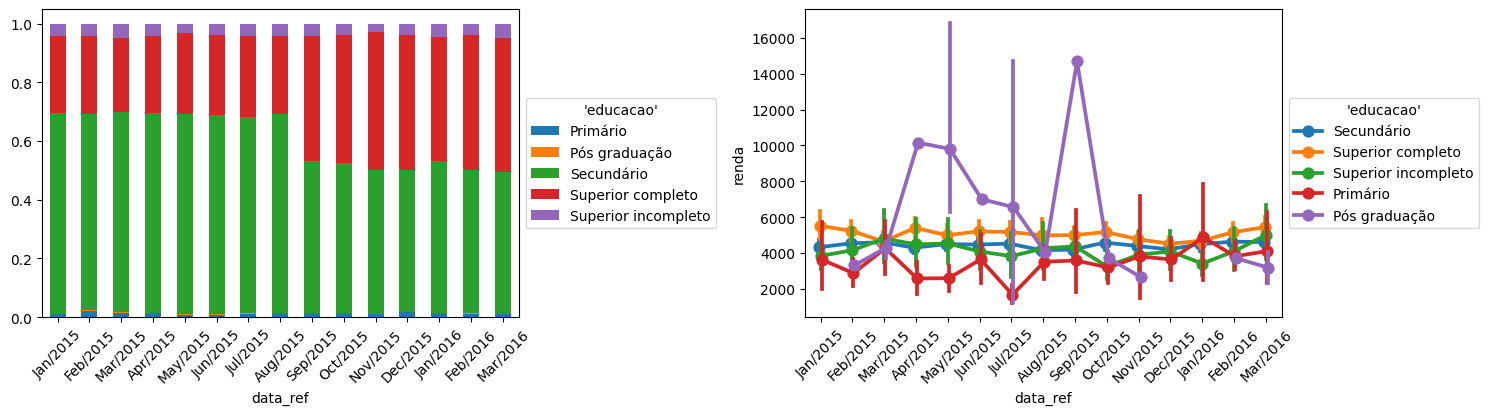

<ipython-input-14-8ea99851feb1>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, ci=95, ax=axes[1])
<ipython-input-14-8ea99851feb1>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


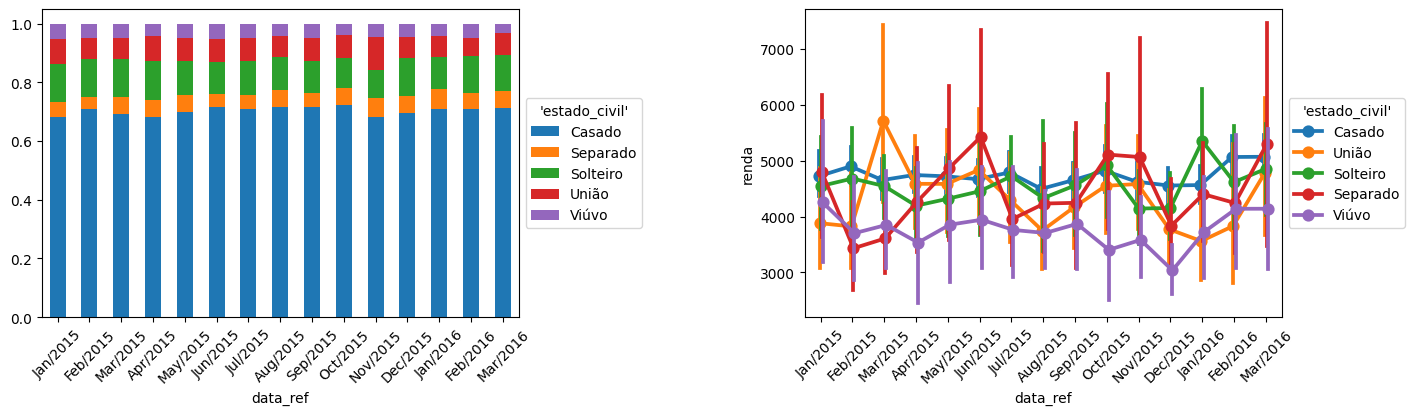

<ipython-input-14-8ea99851feb1>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, ci=95, ax=axes[1])
<ipython-input-14-8ea99851feb1>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=tick_labels, rotation=45)


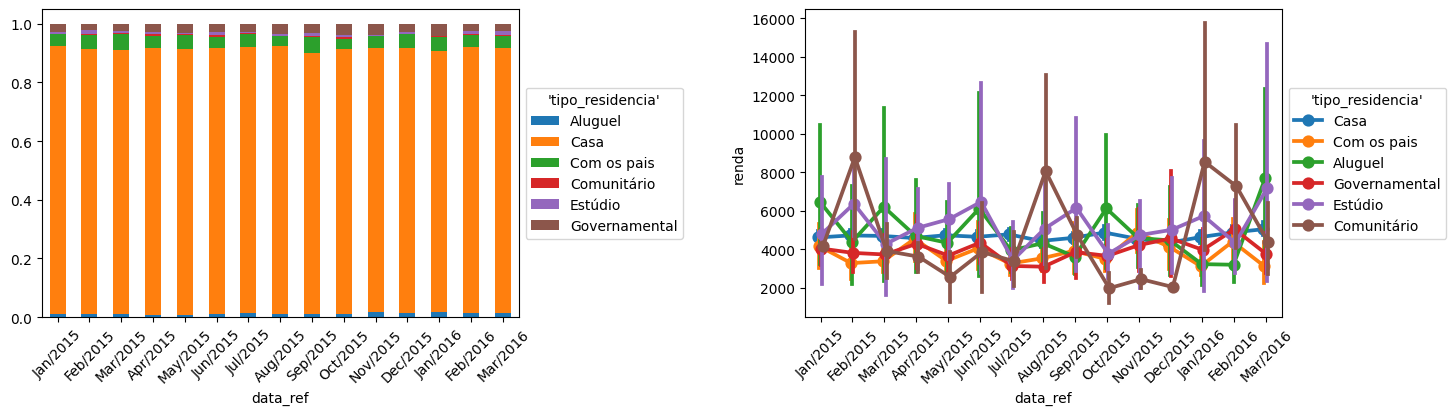

In [14]:
plt.rc('figure', figsize=(16,4))

for col in qualitative:
    fig, axes = plt.subplots(1,2)
    fig.subplots_adjust(wspace=.6)

    tick_labels = df['data_ref'].map(lambda x: x.strftime('%b/%Y')).unique()

    # barras empilhadas:
    df_crosstab = pd.crosstab(index=df['data_ref'],
                              columns=df[col],
                              normalize='index')
    ax0 = df_crosstab.plot.bar(stacked=True, ax=axes[0])
    ax0.set_xticklabels(labels=tick_labels, rotation=45)
    axes[0].legend(bbox_to_anchor=(1,.5), loc=6, title=f"'{col}'")

    # perfis médios no tempo:
    ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=df, dodge=True, ci=95, ax=axes[1])
    ax1.set_xticklabels(labels=tick_labels, rotation=45)
    axes[1].legend(bbox_to_anchor=(1,.5), loc=6, title=f"'{col}'")

    plt.show()

Como descrito na resposta do exercício anterior, houve uma alteração na variável escolaridade, o que resultou em uma diferença em praticamente metade do período analisado. Exceto por esta variável mencionada, acredito que todas as outras variáveis qualitativas possam ser utilizadas em um modelo devido à estabilidade de distribuição ao longo do tempo.